In [30]:
# ████████╗ █████╗ ██████╗ ███████╗ █████╗     ███████╗
# ╚══██╔══╝██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██╔════╝
#    ██║   ███████║██████╔╝█████╗  ███████║    ███████╗
#    ██║   ██╔══██║██╔══██╗██╔══╝  ██╔══██║    ╚════██║
#    ██║   ██║  ██║██║  ██║███████╗██║  ██║    ███████║
#    ╚═╝   ╚═╝  ╚═╝╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝    ╚══════╝

In [31]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
import random as rnd
import scipy as sci
from matplotlib import cm
import sympy as sym

1. 

In [32]:
x=np.arange(0,20,0.1)
y=np.arange(0,20,0.1)

In [33]:
def InitT():
    T=np.zeros((len(x),len(y)))
    T[0,:] = 10.
    T[20,:] = 0.
    T[:,0] = 0.
    T[:,20] = 0.
    return T

In [34]:
u=InitT()

In [35]:
def Poisson(x,y):
    return np.exp(-x*y)

In [36]:
def Relajacion(T,f,Nit = int(1e5), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    h = 0.1
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )+  f(x[i],y[i])*h**2/4
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        

In [37]:
usol,itmax=Relajacion(u,Poisson)

  3%|▉                                  | 2518/100000 [07:26<4:48:16,  5.64it/s]

2518


<IPython.core.display.Javascript object>


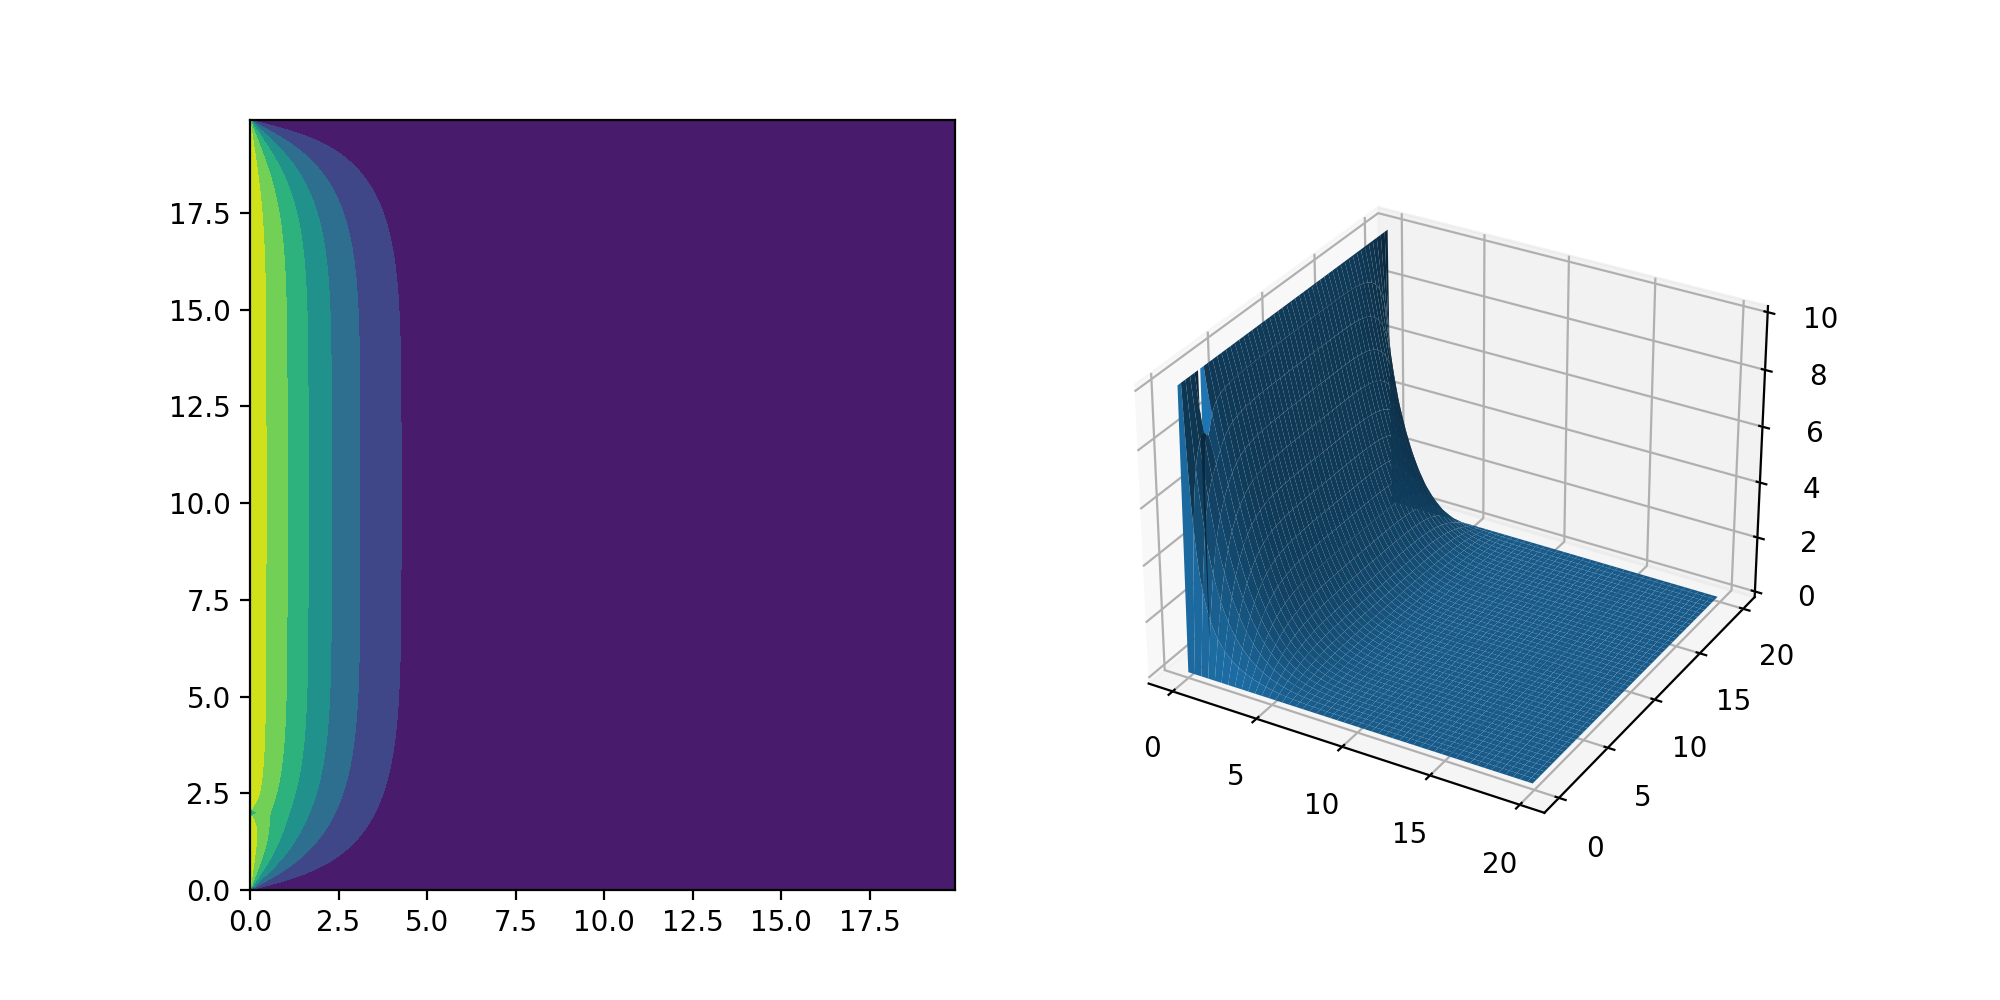

In [38]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax_ = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)


ax_.plot_surface(X,Y,usol.T)
ax.contourf(X,Y,usol.T)

2.

In [13]:
x=np.arange(0,1,0.2)
y=np.arange(0,1,0.2)
t=np.arange(0,1,0.1)
dx = x[1]-x[0]
dt = t[1]-t[0]

alpha=beta = 1

lamb = (alpha*dt)/dx**2
mu = (beta*dt)/dx**2



In [15]:
def InitT():
    
    u = np.zeros((len(t),len(x),len(y)))
    u[0,:,:]=np.sin(np.pi*(x+y))
    for l in range(len(t)):
        u[l,:,0] = np.exp(-2*np.pi**2*t[l])*np.sin(np.pi*y)
        u[l,0,:] = np.exp(-2*np.pi**2*t[l])*np.sin(np.pi*x)
        u[l,:,-1] = np.exp(-2*np.pi**2*t[l])*np.sin(np.pi*(1+y))
        u[l,-1,:] = np.exp(-2*np.pi**2*t[l])*np.sin(np.pi*(1+x))
    
    return u

In [16]:
T=InitT()

In [17]:
def GetSolution():
    
    for l in range(1,len(t)):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                Tm = T[l-1,i,j]*(1-2*lamb-2*mu) + lamb*(T[l-1,i+1,j] + T[l-1,i-1,j]) + mu*(T[l-1,i,j+1] + T[l-1,i,j-1])
                
                T[l,i,j] += 0.05*(Tm - T[l,i,j])

In [18]:
GetSolution()

<IPython.core.display.Javascript object>


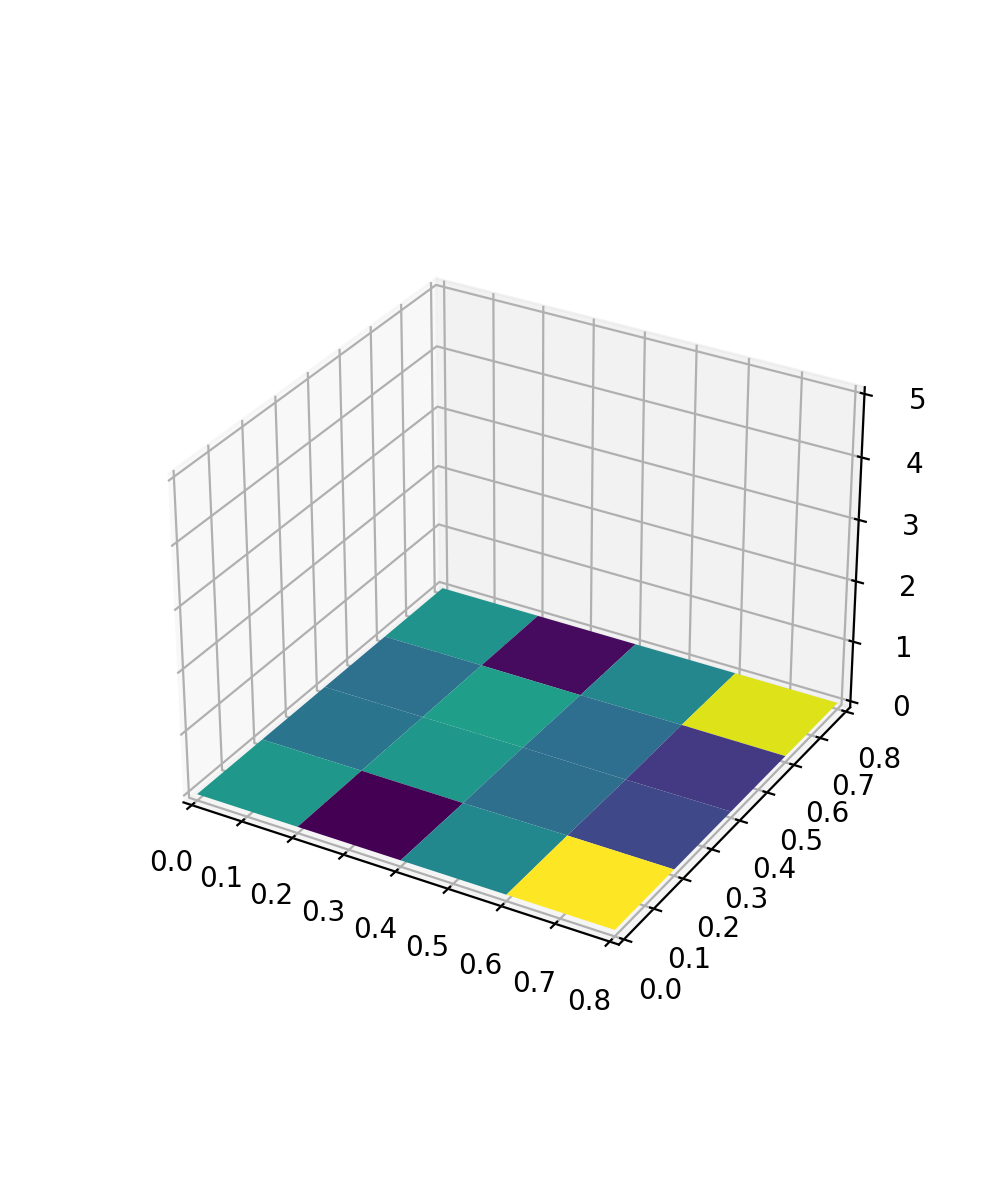

In [20]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X_1,Y_1 = np.meshgrid(x,y)




def Update(i):

    ax.clear()
    ax.set_xlim3d(0,0.8)
    ax.set_ylim3d(0,0.8)
    ax.set_zlim3d(0,5)
    ax.plot_surface(X_1,Y_1,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t))


3. Partiendo de la representación del Laplaciano en coordenadas cilíndricas:

$\nabla^2 u = \frac{\partial^2 u}{\partial \rho^2} + \frac{1}{\rho^2} \frac{\partial^2 u}{\partial \phi^2} + \frac{1}{\rho} \frac{\partial u}{\partial \rho}$

Entonces la ecuación de onda bidimensional queda expresada como:

$\frac{\partial^2 u}{\partial t^2} = \alpha^2 \nabla^2 u = \alpha^2 \left [  \frac{\partial^2 u}{\partial \rho^2} + \frac{1}{\rho^2} \frac{\partial^2 u}{\partial \phi^2} + \frac{1}{\rho} \frac{\partial u}{\partial \rho}\right ]$

Discretizando de forma central:

$\frac{u^{l + 1}_{i, j} - 2u^{l}_{i, j} + u^{l - 1}_{i, j}}{(\Delta{t})^{2}} = \alpha^{2} \cdot \left[\frac{u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j}}{(\Delta{\rho})^{2}} + \frac{1}{\rho[i]^{2}}\frac{u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}}{(\Delta{\phi})^{2}} + \frac{1}{\rho[i]}\frac{u^{l}_{i, j} - u^{l}_{i - 1, j}}{\Delta\rho}\right]$

Con $i,j$ siendo los índices de los ángulos y los radios respectivamente y $l$ el tiempo.

Despejando para $l+1$:

$u^{l + 1}_{i, j} = (\Delta{t})^{2}\alpha^{2} \cdot \left[\frac{u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j}}{(\Delta{\rho})^{2}} + \frac{1}{\rho[i]^{2}}\frac{u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}}{(\Delta{\phi})^{2}} + \frac{1}{\rho[i]}\frac{u^{l}_{i, j} - u^{l}_{i - 1, j}}{\Delta\rho}\right] + 2u^{l}_{i, j} - u^{l - 1}_{i, j}$

$u^{l + 1}_{i, j} = \left(\frac{\alpha\Delta{t}}{\Delta{\rho}}\right)^{2} \cdot \left[u^{l}_{i + 1, j} - 2u^{l}_{i, j} + u^{l}_{i - 1, j} + \left(\frac{\Delta\rho}{\rho[i]\Delta{\phi}}\right)^{2} \left(u^{l}_{i, j + 1} - 2u^{l}_{i, j} + u^{l}_{i, j - 1}\right) + \frac{\Delta\rho}{\rho[i]} \left(u^{l}_{i, j} - u^{l}_{i - 1, j}\right)\right] + 2u^{l}_{i, j} - u^{l - 1}_{i, j}$

$u_{i, j}^{l + 1} = \nu^{2} \cdot \left[u_{i + 1, j}^{l} - 2u_{i, j}^{l} + u_{i - 1, j}^{l} + \left(\frac{\lambda}{\rho[i]}\right)^{2} \cdot \left(u_{i, j + 1}^{l} - 2u_{i, j}^{l} + u_{i, j - 1}^{l}\right) + \frac{\Delta\rho}{\rho[i]} \cdot \left(u_{i, j}^{l} - u_{i - 1, j}^{l}\right)\right] + 2u_{i, j}^{l} - u_{i, j}^{l - 1}$

Lo cuál se buscaba inicialmente.


4.

In [40]:
Nt = 400
Nx = 20
Ny = 20

x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Nx)
t = np.linspace(0,3,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 2.

lambda_ = v*deltat/deltax
mu_ = 5*deltat/deltay

print(lambda_,mu_)

0.14285714285714285 0.35714285714285715


In [41]:
def ui(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

In [42]:
u = np.zeros((Nt,Nx,Ny))
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [43]:
def GetSolution():
    
    
    for l in tqdm(range(1,len(t))):
        
        if l == 1:
            u[l,:,:] = u[l-1,:,:]
        else:
        
            for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    u[l,i,j] = 2*(1-lambda_**2-mu_**2)*u[l-1,i,j] \
                    + lambda_**2*( u[l-1,i+1,j] + u[l-1,i-1,j] ) \
                    + mu_**2*( u[l-1,i,j+1] + u[l-1,i,j-1] ) \
                    - u[l-2,i,j] 

In [44]:
GetSolution()

100%|███████████████████████████████████████| 399/399 [00:00<00:00, 1081.65it/s]


<IPython.core.display.Javascript object>


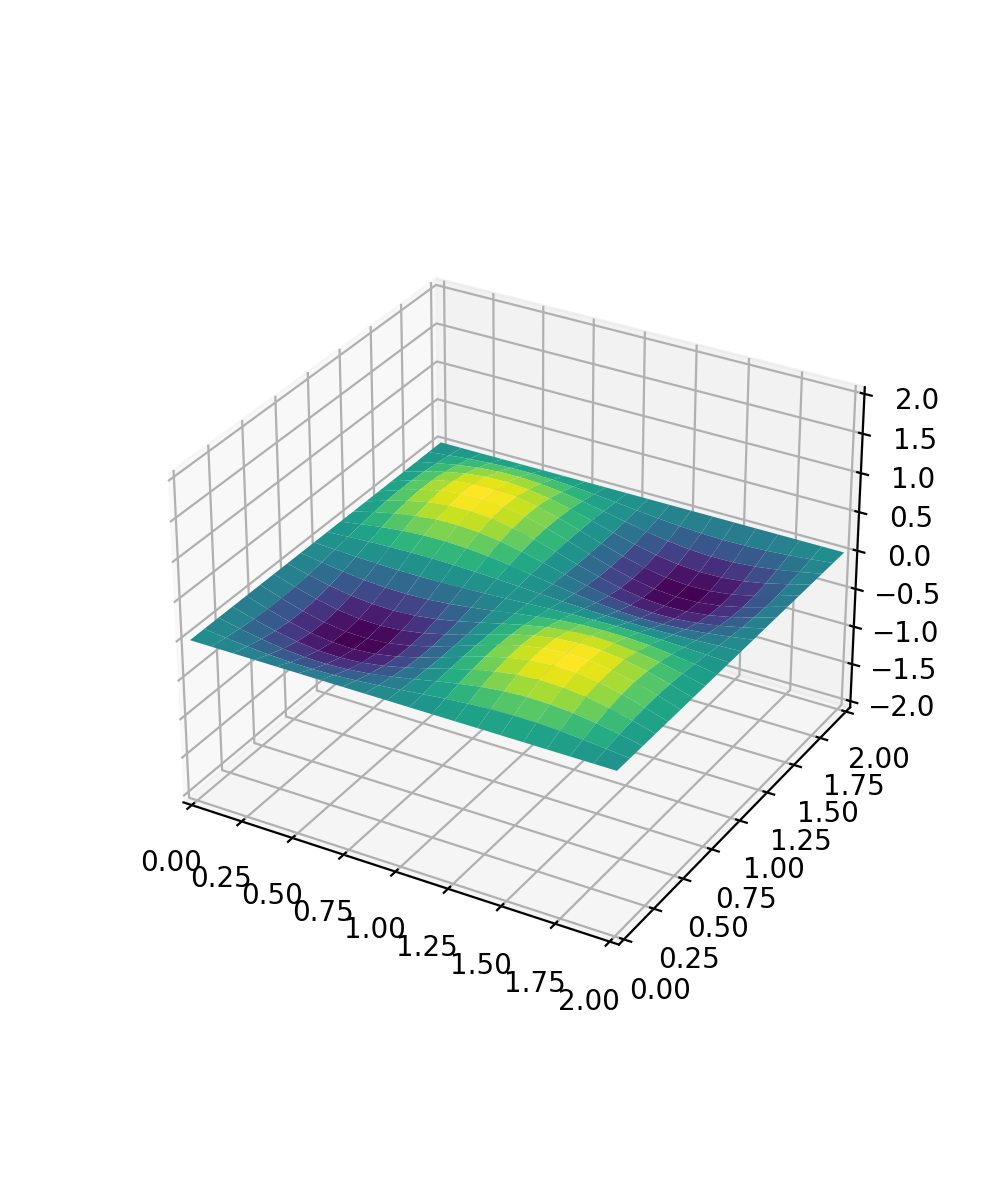

In [46]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def Update(i):

    ax.clear()
    ax.set_xlim3d(0,2)
    ax.set_ylim3d(0,2)
    ax.set_zlim3d(-2,2)
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t))
